# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Análise e Previsão de Séries Temporais com Inteligência Artificial</font>

## <font color='blue'>Projeto 3</font>
### <font color='blue'>Usando Transformers Para Prever Longas Séries Temporais</font>

![DSA](imagens/P3.png)

## Instalando e Carregando os Pacotes

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
# !pip install -q -U watermark

In [3]:
!pip install -q torch==2.0.1

In [4]:
# Imports
import sys
import time
import math
import torch
import pickle
import numpy as np
import pandas as pd
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from dateutil.relativedelta import relativedelta
from datetime import datetime
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

torch     : 2.0.1
matplotlib: 3.5.2
sys       : 3.9.13 (main, Aug 25 2022, 23:26:10) 
[GCC 11.2.0]
pandas    : 1.4.4
numpy     : 1.23.5



## Carregando os Dados

In [6]:
# Carregando os dados
df = pd.read_csv('dados/train.csv')

In [7]:
# Shape
df.shape

(90000, 5)

In [8]:
# Amostra dos dados
df.head()

Id       Timestep   Course                Faculty  Expected
0   0  AY1810-AY1811  VX27870      Prof. Jadon Haney       386
1   1  AY1810-AY1811  SN11041  Prof. Kennedy Shields       158
2   2  AY1810-AY1811  CG17623    Prof. Brandon Silva       303
3   3  AY1810-AY1811  GW27856      Prof. Lorena Mays       207
4   4  AY1810-AY1811  SI10212   Prof. Haleigh Romero       329

## Limpeza da Série Temporal e Ajuste da Data

In [9]:
# Não usaremos essas duas colunas
df = df.drop(columns = ['Faculty', 'Course'])

In [10]:
# Colocamos o Timestep em X
X = df['Timestep']

In [11]:
print(X)

0        AY1810-AY1811
1        AY1810-AY1811
2        AY1810-AY1811
3        AY1810-AY1811
4        AY1810-AY1811
             ...      
89995    AY1986-AY1987
89996    AY1986-AY1987
89997    AY1986-AY1987
89998    AY1986-AY1987
89999    AY1986-AY1987
Name: Timestep, Length: 90000, dtype: object


In [12]:
# Criamos uma lista de 90.000 posições
X_new = [None] * 90000

In [13]:
print(X_new)

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, Non

In [14]:
# Loop pelo comprimento de X para alimentar X_new
for i in range(len(X)):
    X_new[i] = int(X[i][2:6])

In [15]:
print(X_new)

[1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 1810, 181

In [16]:
data_inicial = '1/1/1810' 

In [17]:
formato_data = '%d/%m/%Y'

In [18]:
# Cria um objeto de data
dtObj = datetime.strptime(data_inicial, formato_data)

In [19]:
dtObj

datetime.datetime(1810, 1, 1, 0, 0)

https://dateutil.readthedocs.io/en/stable/relativedelta.html

In [20]:
# Loop pelo comprimento de X, adicionado o objeto data com o delta relativo para gerar data de X_new
for i in range(len(X)):
    r = dtObj + relativedelta(days = i)
    X_new[i] = r.date()

In [21]:
print(X_new)

[datetime.date(1810, 1, 1), datetime.date(1810, 1, 2), datetime.date(1810, 1, 3), datetime.date(1810, 1, 4), datetime.date(1810, 1, 5), datetime.date(1810, 1, 6), datetime.date(1810, 1, 7), datetime.date(1810, 1, 8), datetime.date(1810, 1, 9), datetime.date(1810, 1, 10), datetime.date(1810, 1, 11), datetime.date(1810, 1, 12), datetime.date(1810, 1, 13), datetime.date(1810, 1, 14), datetime.date(1810, 1, 15), datetime.date(1810, 1, 16), datetime.date(1810, 1, 17), datetime.date(1810, 1, 18), datetime.date(1810, 1, 19), datetime.date(1810, 1, 20), datetime.date(1810, 1, 21), datetime.date(1810, 1, 22), datetime.date(1810, 1, 23), datetime.date(1810, 1, 24), datetime.date(1810, 1, 25), datetime.date(1810, 1, 26), datetime.date(1810, 1, 27), datetime.date(1810, 1, 28), datetime.date(1810, 1, 29), datetime.date(1810, 1, 30), datetime.date(1810, 1, 31), datetime.date(1810, 2, 1), datetime.date(1810, 2, 2), datetime.date(1810, 2, 3), datetime.date(1810, 2, 4), datetime.date(1810, 2, 5), datet

https://www.timeanddate.com/date/duration.html

In [22]:
# Adiciona X_new ao dataframe
df['New'] = X_new

In [23]:
# Drop das colunas que não precisamos mais
df = df.drop(columns = ['Timestep', 'Id'])

In [24]:
# New agora será o índice
df = df.set_index('New')

In [25]:
# Convertemos a colunas com o número esperado de alunos para float
df['Expected'] = df['Expected'].astype('float32')

In [26]:
df.shape

(90000, 1)

In [27]:
df.head(367)

Expected
New                 
1810-01-01     386.0
1810-01-02     158.0
1810-01-03     303.0
1810-01-04     207.0
1810-01-05     329.0
...              ...
1810-12-29     458.0
1810-12-30     385.0
1810-12-31     414.0
1811-01-01     509.0
1811-01-02     358.0

[367 rows x 1 columns]

In [28]:
df.tail()

Expected
New                 
2056-05-25     476.0
2056-05-26     222.0
2056-05-27     295.0
2056-05-28     187.0
2056-05-29    1103.0

In [29]:
# Converte os dados para array numpy
dados = df.values.astype('float32')

## Pré-Processamento da Série Temporal

> Primeiro dividimos o conjunto de dados em sequências, essas sequências serão a entrada para o modelo e a saída será o número após a sequência (por isso history_size = 13, pois teremos sequência de 12 como entrada e o próximo item como saída).

In [30]:
# Função para dividir os dados em sequências
def func_divide_dados_seq(dataset, 
                          start_index = 0, 
                          end_index = None, 
                          history_size = 13, 
                          step = 1):
    
    # Dados
    data = []
    
    # Índice inicial
    start_index = start_index + history_size
    
    # Ajusta o índice final
    if end_index is None:
        end_index = len(dataset)
    
    # Loop para gerar a sequência
    for i in range(start_index, end_index):
        indices = range(i - history_size, i, step)
        data.append(dataset[indices])
    
    # Retorna como array numpy
    return np.array(data)

> Depois separamos os dados em treino, validação e teste.

In [31]:
# Função para separar os dados em treino, validação e teste
def func_separa_dados(data, TRAIN_SPLIT = 0.8, VAL_SPLIT = 0.6):
    
    # Calcula a média
    data_mean = data.mean(axis = 0)
    
    # Calcula o desvio padrão
    data_std = data.std(axis = 0)
    
    # Normaliza os dados
    data = (data - data_mean) / data_std
    
    # Grava média e desvio padrão
    stats = (data_mean, data_std)

    # Converte o dataset em uma sequência
    seq_dados = func_divide_dados_seq(data, 
                                      start_index = 0, 
                                      end_index = None, 
                                      history_size = 13, 
                                      step = 1)

    # Split 1
    treino, valid = train_test_split(seq_dados, 
                                     train_size = TRAIN_SPLIT, 
                                     shuffle = True, 
                                     random_state = 123)
    
    # Split 2
    valid, teste = train_test_split(seq_dados, 
                                    train_size = VAL_SPLIT, 
                                    shuffle = True, 
                                    random_state = 123)

    return treino, valid, teste

> Preparamos os dados no formato de entrada e saída.

In [32]:
# Função que separa entrada e saída
def func_separa_input_target(separador):
    
    # Entrada e saída no formato de Tensor
    inputs = torch.tensor(separador[:, :-1, :], device = device)
    targets = torch.tensor(separador[:, 1:, :], device = device)
    
    return inputs, targets

> Por fim vamos construir os datasets finais.

In [33]:
# Prepara os datasets finais
def func_prepara_dados_finais(train_data, 
                              val_data, 
                              test_data, 
                              batch_size = 32, 
                              target_features = list(range(1))):
    
    # Separa as entradas e saídas de treino, valid e teste
    x_treino, y_treino = func_separa_input_target(train_data)
    x_val, y_val = func_separa_input_target(val_data)
    x_teste, y_teste = func_separa_input_target(test_data)

    # Converte para tensor
    dataset_treino = torch.utils.data.TensorDataset(x_treino, y_treino)
    dataset_valid = torch.utils.data.TensorDataset(x_val, y_val)
    dataset_teste = torch.utils.data.TensorDataset(x_teste, y_teste)

    # Cria os dataloaders no formato do PyTorch
    loader_treino = torch.utils.data.DataLoader(dataset_treino, batch_size = batch_size)
    loader_valid = torch.utils.data.DataLoader(dataset_valid, batch_size = batch_size)
    loader_teste = torch.utils.data.DataLoader(dataset_teste, batch_size = batch_size)
    
    return loader_treino, loader_valid, loader_teste

In [34]:
# Cria as amostras de dados
dados_treino, dados_valid, dados_teste = func_separa_dados(dados)

In [35]:
# Shape
dados_treino.shape

(71989, 13, 1)

> Vamos configurar a GPU como um dispositivo primário. Se a sua máquina não tiver GPU a CPU será usada.

Caso sua máquina tenha GPU, para usá-la você deve instalar a plataforma CUDA a partir do link abaixo (somente Linux e Windows):

https://developer.nvidia.com/cuda-downloads

Sua GPU deve ter compute capability 3 ou superior e você pode checar seu modelo aqui:

https://developer.nvidia.com/cuda-gpus

Alternativamente você pode usar GPU gratuitamente no Google Colab:

https://colab.research.google.com

In [36]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [37]:
print(device)

cuda:0


> Prepara as amostras de dados finais.

In [38]:
# Datasets finais
dataset_treino_final, dataset_valid_final, dataset_teste_final = func_prepara_dados_finais(dados_treino, 
                                                                                           dados_valid, 
                                                                                           dados_teste)

## Construindo o Modelo Transformer

A arquitetura Transformer foi introduzida em um artigo chamado "Attention is All You Need" pelos pesquisadores do Google Brain. Esta arquitetura é a base para muitos modelos de aprendizado de máquina modernos, incluindo o BERT, GPT e outros modelos de linguagem natural. Abaixo o paper da pesquisa original:

https://arxiv.org/abs/1706.03762

A arquitetura Transformer é composta por duas partes principais: o codificador (encoder) e o decodificador (decoder). Ambos são compostos por várias camadas, cada uma das quais inclui múltiplas cabeças de atenção e redes de feed-forward densas.

![DSA](imagens/transformer.png)

**Codificador**: O codificador recebe a entrada, que é uma sequência de tokens. Cada token é incorporado em um vetor de alta dimensão e adicionado a um vetor de posição, que fornece informações sobre a posição do token na sequência. Em seguida, esta sequência de vetores é passada através de várias camadas do codificador. Cada camada do codificador inclui duas subcamadas: uma camada de atenção auto-regressiva e uma camada de rede de feed-forward. A atenção auto-regressiva permite que o modelo considere todos os tokens na sequência ao mesmo tempo, de forma que a saída de cada token possa depender de todos os outros tokens. A camada da rede de feed-forward é uma simples rede neural totalmente conectada que é aplicada a cada token de forma independente.

**Decodificador**: O decodificador também é composto por várias camadas, cada uma das quais inclui três subcamadas: uma camada de atenção auto-regressiva, uma camada de atenção cruzada que se concentra nas saídas do codificador, e uma camada de rede de feed-forward. A camada de atenção auto-regressiva funciona da mesma forma que no codificador, mas a camada de atenção cruzada permite que o decodificador considere a saída do codificador. Isso significa que a saída de cada token no decodificador pode depender de todos os tokens na entrada e em todas as saídas anteriores.

Essas camadas permitem que a arquitetura Transformer processe eficientemente sequências longas de dados, fazendo com que cada token dependa de todos os outros tokens na sequência. Isso a torna ideal para tarefas de processamento de linguagem natural, como tradução automática e geração de texto e processamento de longas séries temporais.

Vamos construir cada elemento da arquitetura Transformer.

### MultiHead Attention

O código abaixo é uma implementação em PyTorch de uma camada de atenção de múltiplas cabeças, que é um componente-chave do modelo Transformer.

Aqui está o que cada parte do código está fazendo:

O método **__init__** inicializa a camada. Ele define o número de "cabeças" de atenção H e a dimensão D dos vetores de entrada. Ele também define quatro camadas lineares (também conhecidas como camadas totalmente conectadas ou densas) que serão usadas para transformar os vetores de entrada.

O método **concat_heads** é usado para concatenar as saídas de todas as cabeças de atenção. Ele primeiro permuta as dimensões do tensor de entrada para colocar as cabeças e a dimensão do vetor no final e depois redimensiona o tensor para concatenar as saídas das cabeças.

O método **split_heads** é o oposto de concat_heads. Ele divide o tensor de entrada em várias "cabeças" de atenção. Ele primeiro redimensiona o tensor de entrada para criar uma nova dimensão para as cabeças e depois permuta as dimensões para colocar as cabeças no início.

O método **forward** é o método principal que é chamado quando a camada é aplicada a um tensor de entrada. Ele calcula as matrizes de consulta q, chave k, e valor v aplicando as camadas lineares correspondentes à entrada. Em seguida, ele divide estas matrizes em várias cabeças usando o método split_heads. Depois, ele calcula os escores de atenção fazendo o produto escalar entre q e k, e divide pelo quadrado da dimensão para normalização (conhecido como "scaled dot-product attention"). Se uma máscara é fornecida, ela é adicionada aos escores de atenção para mascarar certos valores. Em seguida, ele aplica a função softmax aos escores de atenção para obter os pesos de atenção e multiplica estes pesos pela matriz v para obter a saída de cada cabeça de atenção. Finalmente, ele concatena as saídas de todas as cabeças usando o método concat_heads, e aplica uma última camada linear para obter a saída final.

A saída do método forward é a saída final da camada de atenção de múltiplas cabeças e os pesos de atenção. A saída pode ser usada como entrada para a próxima camada no modelo e os pesos de atenção podem ser usados para visualizar quais partes da entrada a camada de atenção está focando.

![DSA](imagens/mha.png)

In [39]:
# Classe
class MultiHeadAttention(nn.Module):

    def __init__(self, D, H):
        super(MultiHeadAttention, self).__init__()
        
        # Número de cabeças
        self.H = H 
        
        # Dimensão
        self.D = D 
        
        self.wq = nn.Linear(D, D*H)
        self.wk = nn.Linear(D, D*H)
        self.wv = nn.Linear(D, D*H)
        self.dense = nn.Linear(D*H, D)

    def concat_heads(self, x):
        
        B, H, S, D = x.shape
        x = x.permute((0, 2, 1, 3)).contiguous()  # (B, S, H, D)
        x = x.reshape((B, S, H*D))   # (B, S, D*H)
        
        return x

    def split_heads(self, x):
        
        B, S, D_H = x.shape
        x = x.reshape(B, S, self.H, self.D)    # (B, S, H, D)
        x = x.permute((0, 2, 1, 3))  # (B, H, S, D)
        return x

    def forward(self, x, mask):

        q = self.wq(x)  # (B, S, D*H)
        k = self.wk(x)  # (B, S, D*H)
        v = self.wv(x)  # (B, S, D*H)

        q = self.split_heads(q)  # (B, H, S, D)
        k = self.split_heads(k)  # (B, H, S, D)
        v = self.split_heads(v)  # (B, H, S, D)

        attention_scores = torch.matmul(q, k.transpose(-1, -2)) #(B,H,S,S)
        attention_scores = attention_scores / math.sqrt(self.D)

        if mask is not None:
            attention_scores += (mask * -1e9)
        
        attention_weights = nn.Softmax(dim=-1)(attention_scores)
        scaled_attention = torch.matmul(attention_weights, v)  # (B, H, S, D)
        concat_attention = self.concat_heads(scaled_attention) # (B, S, D*H)
        output = self.dense(concat_attention)  # (B, S, D)

        return output, attention_weights

In [40]:
# Inicializa os valores
B, S, H, D = 9, 11, 5, 8

In [41]:
# Cria o objeto da classe
mha = MultiHeadAttention(D, H)

In [42]:
# Executa o método forward
out, att = mha.forward(torch.zeros(B, S, D), mask=None)

In [43]:
# Shape
out.shape, att.shape

(torch.Size([9, 11, 8]), torch.Size([9, 5, 11, 11]))

### Positional Encoding

Usamos a combinação de equações de senos e cossenos para criar a codificação de posição dos dados de entrada. Como para uma análise de séries temporais é importante manter a posição de informação dos valores de dados de entrada, então aqui usamos codificações posicionais.

O código abaixo implementa duas funções importantes que são usadas na arquitetura Transformer: a codificação posicional (positional_encoding) e a criação de uma máscara de visualização à frente (create_look_ahead_mask).

**Codificação Posicional (positional_encoding)**:

A codificação posicional é usada no Transformer para dar ao modelo alguma informação sobre a posição relativa dos tokens na sequência de entrada. Isso é importante porque o Transformer, ao contrário dos modelos RNN ou LSTM, não tem noção inata de ordem sequencial. A codificação posicional é adicionada aos vetores de incorporação (embedding) de token antes de serem alimentados no modelo.

A função positional_encoding começa calculando uma matriz de "ângulos" usando a função get_angles. Esta matriz tem um tamanho de position por D, onde position é o número de posições na sequência e D é a dimensão dos vetores de entrada.

Os ângulos são então aplicados a uma função sinusoidal, dependendo se o índice é par ou ímpar. Isto é feito para que a codificação posicional possa capturar informações sobre a posição relativa de diferentes pares de tokens.

Finalmente, a matriz de codificação posicional é redimensionada para ter uma dimensão extra no início, para que ela possa ser adicionada aos vetores de incorporação (embedding) de token que têm uma dimensão extra para o tamanho do lote.

Esta é a fórmula matemática:

![DSA](imagens/fig1.png)

**Máscara de Visualização à Frente (create_look_ahead_mask)**:

A máscara de visualização à frente é usada no decodificador do Transformer para impedir que cada posição na sequência de saída tenha acesso a posições futuras. Isto é feito para simular a geração de sequências "autoregressiva", onde cada token é gerado um de cada vez.

A função create_look_ahead_mask cria uma matriz de uns com forma (size, size), onde size é o tamanho da sequência de saída. Em seguida, usamos a função torch.triu para zerar todos os elementos abaixo da diagonal principal. Isto resulta em uma máscara que tem uns em todas as posições onde um token na sequência de saída não deve ter acesso a um token na sequência de entrada.

![DSA](imagens/pe.png)

In [44]:
# Função
def get_angles(pos, i, D):
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(D))
    return pos * angle_rates

In [45]:
# Função
def positional_encoding(D, position=20, dim=3, device=device):
    
    angle_rads = get_angles(np.arange(position)[:, np.newaxis], np.arange(D)[np.newaxis, :], D)
    
    # Aplica sin a índices pares na matriz; 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    
    # Aplica cos a índices ímpares na matriz; 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    
    if dim == 3:
        pos_encoding = angle_rads[np.newaxis, ...]
    elif dim == 4:
        pos_encoding = angle_rads[np.newaxis,np.newaxis,  ...]
    
    return torch.tensor(pos_encoding, device = device)

In [46]:
# Função que implementa a máscara look_ahead para mascarar intervalos de tempo futuros
def create_look_ahead_mask(size, device = device):
    
    mask = torch.ones((size, size), device = device)
    mask = torch.triu(mask, diagonal = 1)
    
    return mask  

In [47]:
# Testa a função
create_look_ahead_mask(6)

tensor([[0., 1., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0.]], device='cuda:0')

A saída acima está representada na imagem abaixo:

![DSA](imagens/fig2.png)

### Camada do Transformador

O código abaixo define uma única camada do Transformer, que combina a atenção de múltiplas cabeças com uma rede feed-forward e aplica a normalização de camada e o dropout.

**Inicialização (__init__)**:

A função __init__ inicializa a camada do Transformer. Ela define a dimensão D, o número de "cabeças" de atenção H, a dimensão oculta da rede MLP hidden_mlp_dim e a taxa de dropout dropout_rate. Ela também inicializa as camadas que serão usadas: a atenção de múltiplas cabeças mha, duas camadas lineares para a rede MLP mlp_hidden e mlp_out, duas camadas de normalização layernorm1 e layernorm2, e duas camadas de dropout dropout1 e dropout2.

**Propagação Para Frente (forward)**:

A função forward é chamada quando a camada do Transformer é aplicada a um tensor de entrada x com uma máscara de visualização à frente look_ahead_mask.

Primeiro, a entrada é passada através da camada de atenção de múltiplas cabeças. A saída da atenção de múltiplas cabeças é então passada através da primeira camada de dropout e então somada com a entrada original (uma técnica conhecida como "skip connection" ou "residual connection"). A normalização de camada é então aplicada ao resultado.

Em seguida, a saída da normalização de camada é passada através da rede MLP, que consiste em uma camada linear, uma função de ativação ReLU, uma segunda camada linear e uma segunda camada de dropout.

Finalmente, a saída da rede MLP é somada à saída da camada de atenção (outra "skip connection") e a normalização de camada é aplicada novamente para produzir a saída final.

A função forward retorna a saída final da camada do Transformer, bem como os pesos de atenção da camada de atenção de múltiplas cabeças, que podem ser usados para visualizar quais partes da entrada a camada de atenção está focando.

In [48]:
# Classe
class TransformerLayer(nn.Module):
    
    def __init__(self, D, H, hidden_mlp_dim, dropout_rate):
        
        super(TransformerLayer, self).__init__()
        
        self.dropout_rate = dropout_rate
        
        self.mlp_hidden = nn.Linear(D, hidden_mlp_dim)
        
        self.mlp_out = nn.Linear(hidden_mlp_dim, D)
        
        self.layernorm1 = nn.LayerNorm(D, eps=1e-9)
        
        self.layernorm2 = nn.LayerNorm(D, eps=1e-9)
        
        self.dropout1 = nn.Dropout(dropout_rate)
        
        self.dropout2 = nn.Dropout(dropout_rate)

        self.mha = MultiHeadAttention(D, H)

    def forward(self, x, look_ahead_mask):
        
        attn, attn_weights = self.mha(x, look_ahead_mask)  # (B, S, D)
        
        attn = self.dropout1(attn) # (B,S,D)
        
        attn = self.layernorm1(attn + x) # (B,S,D)

        mlp_act = torch.relu(self.mlp_hidden(attn))
        
        mlp_act = self.mlp_out(mlp_act)
        
        mlp_act = self.dropout2(mlp_act)
        
        output = self.layernorm2(mlp_act + attn)  # (B, S, D)

        return output, attn_weights

In [49]:
# Cria o objeto
dl = TransformerLayer(16, 3, 32, 0.1)

In [50]:
# Executa o objeto
out, attn = dl(x = torch.zeros(5, 7, 16), look_ahead_mask = None)

In [51]:
# Shape
out.shape, attn.shape

(torch.Size([5, 7, 16]), torch.Size([5, 3, 7, 7]))

### Arquitetura Final do Transformer

O código abaixo implementa o modelo Transformer completo, que combina várias camadas de Transformer, juntamente com projeções de entrada e saída, codificação posicional e dropout.

**Inicialização (__init__)**:

A função __init__ inicializa o modelo Transformer. Ela define o número de camadas do Transformer num_layers, a dimensão D, o número de "cabeças" de atenção H, a dimensão oculta da rede MLP hidden_mlp_dim, o número de características de entrada inp_features, o número de características de saída out_features, e a taxa de dropout dropout_rate. Ela também inicializa as camadas que serão usadas: as projeções de entrada e saída, a codificação posicional, as camadas do Transformer e a camada de dropout.

**Propagação Para Frente (forward)**:

A função forward é chamada quando o modelo Transformer é aplicado a um tensor de entrada x com uma máscara mask.

Primeiro, a entrada é passada através da projeção de entrada, que transforma as características de entrada para a dimensão desejada D. Em seguida, a entrada é multiplicada pela raiz quadrada de D, que é uma técnica de normalização usada na atenção de produto escalar. A codificação posicional é então adicionada à entrada.

Em seguida, a entrada é passada através da camada de dropout e então através de cada camada do Transformer em sequência. Os pesos de atenção de cada camada do Transformer são salvos em um dicionário para análise posterior.

Finalmente, a saída da última camada do Transformer é passada através da projeção de saída, que transforma a saída de volta ao número desejado de características de saída.

A função forward retorna a saída final do modelo Transformer, bem como os pesos de atenção de cada camada do Transformer.

In [52]:
# Classe
class Transformer(nn.Module):

    def __init__(self, num_layers, D, H, hidden_mlp_dim, inp_features, out_features, dropout_rate):
        
        super(Transformer, self).__init__()
        
        self.sqrt_D = torch.tensor(math.sqrt(D))
        
        self.num_layers = num_layers
        
        self.input_projection = nn.Linear(inp_features, D) # input
        
        self.output_projection = nn.Linear(D, out_features) # output
        
        self.pos_encoding = positional_encoding(D)
        
        self.dec_layers = nn.ModuleList([TransformerLayer(D, H, hidden_mlp_dim, 
                                        dropout_rate = dropout_rate
                                       ) for _ in range(num_layers)])
        
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x, mask):
        
        B, S, D = x.shape
        
        attention_weights = {}
        
        x = self.input_projection(x)
        
        x *= self.sqrt_D
        
        x += self.pos_encoding[:, :S, :]

        x = self.dropout(x)

        for i in range(self.num_layers):
            x, block = self.dec_layers[i](x = x, look_ahead_mask = mask)
            
            attention_weights['decoder_layer{}'.format(i + 1)] = block
        
        x = self.output_projection(x)
        
        return x, attention_weights # (B,S,S)

> Vamos testar a arquitetura.

In [53]:
# Testando a arquitetura final
transformer = Transformer(num_layers = 3, 
                          D = 32, 
                          H = 1, 
                          hidden_mlp_dim = 32,
                          inp_features = 1, 
                          out_features = 1, 
                          dropout_rate = 0.1)

In [54]:
# Coloca o modelo no device
transformer.to(device)

Transformer(
  (input_projection): Linear(in_features=1, out_features=32, bias=True)
  (output_projection): Linear(in_features=32, out_features=1, bias=True)
  (dec_layers): ModuleList(
    (0-2): 3 x TransformerLayer(
      (mlp_hidden): Linear(in_features=32, out_features=32, bias=True)
      (mlp_out): Linear(in_features=32, out_features=32, bias=True)
      (layernorm1): LayerNorm((32,), eps=1e-09, elementwise_affine=True)
      (layernorm2): LayerNorm((32,), eps=1e-09, elementwise_affine=True)
      (dropout1): Dropout(p=0.1, inplace=False)
      (dropout2): Dropout(p=0.1, inplace=False)
      (mha): MultiHeadAttention(
        (wq): Linear(in_features=32, out_features=32, bias=True)
        (wk): Linear(in_features=32, out_features=32, bias=True)
        (wv): Linear(in_features=32, out_features=32, bias=True)
        (dense): Linear(in_features=32, out_features=32, bias=True)
      )
    )
  )
  (dropout): Dropout(p=0.1, inplace=False)
)

In [55]:
# Obtém um batch de entrada e saída
(inputs, targets) = next(iter(dataset_treino_final))

In [56]:
# Shape da entrada
S = inputs.shape[1]

In [57]:
S

12

In [58]:
# Cria a máscara
mask = create_look_ahead_mask(S)

In [59]:
mask

tensor([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], device='cuda:0')

In [60]:
# Executa o modelo
out, attn = transformer(x = inputs.float(), mask = mask)

In [61]:
out.shape, attn["decoder_layer1"].shape

(torch.Size([32, 12, 1]), torch.Size([32, 1, 12, 12]))

## Treinamento do Modelo Transformer

In [62]:
# Número de parâmetros do modelo
param_sizes = [p.numel() for p in transformer.parameters()]

In [63]:
print(f"Vamos treinar um total de {np.sum(param_sizes)} parâmetros (pesos) do modelo.")

Vamos treinar um total de 19489 parâmetros (pesos) do modelo.


In [64]:
# Cria o modelo
modelo_transformer = Transformer(num_layers = 3, 
                                 D = 32, 
                                 H = 4, 
                                 hidden_mlp_dim = 32, 
                                 inp_features = 1, 
                                 out_features = 1, 
                                 dropout_rate = 0.1).to(device)

In [65]:
modelo_transformer.modules

<bound method Module.modules of Transformer(
  (input_projection): Linear(in_features=1, out_features=32, bias=True)
  (output_projection): Linear(in_features=32, out_features=1, bias=True)
  (dec_layers): ModuleList(
    (0-2): 3 x TransformerLayer(
      (mlp_hidden): Linear(in_features=32, out_features=32, bias=True)
      (mlp_out): Linear(in_features=32, out_features=32, bias=True)
      (layernorm1): LayerNorm((32,), eps=1e-09, elementwise_affine=True)
      (layernorm2): LayerNorm((32,), eps=1e-09, elementwise_affine=True)
      (dropout1): Dropout(p=0.1, inplace=False)
      (dropout2): Dropout(p=0.1, inplace=False)
      (mha): MultiHeadAttention(
        (wq): Linear(in_features=32, out_features=128, bias=True)
        (wk): Linear(in_features=32, out_features=128, bias=True)
        (wv): Linear(in_features=32, out_features=128, bias=True)
        (dense): Linear(in_features=128, out_features=32, bias=True)
      )
    )
  )
  (dropout): Dropout(p=0.1, inplace=False)
)>

In [66]:
# Otimizador
optimizer = torch.optim.RMSprop(modelo_transformer.parameters(), lr = 0.00005)

In [67]:
# Número de épocas de treino
n_epochs = 5

In [68]:
# Número de iterações em cada época
niter = len(dataset_treino_final)

In [69]:
# Listas para os erros
losses, val_losses = [], []

In [70]:
%%time

# Loop de treino
for e in tqdm(range(n_epochs)):
    
    # Coloca o modelo em modo de treino
    modelo_transformer.train()
    
    # Inicializa o contador
    sum_train_loss = 0.0
    
    # Loop pelos dados de treino
    for x, y in dataset_treino_final:
        
        S = x.shape[1]
        
        mask = create_look_ahead_mask(S)
        
        out, _ = modelo_transformer(x.float(), mask)
        
        loss = torch.nn.MSELoss()(out, y)
        
        sum_train_loss += loss.item()
        
        loss.backward()
        
        optimizer.step()
        
    losses.append(sum_train_loss / niter)
    
    # Loop pelos dados de validação para avaliar o modelo
    modelo_transformer.eval()
    
    sum_val_loss = 0.0
    
    for i, (x, y) in enumerate(dataset_valid_final):
        
        S = x.shape[1]
        
        mask = create_look_ahead_mask(S)
        
        out, _ = modelo_transformer(x, mask)
        
        loss = torch.nn.MSELoss()(out, y)
        
        sum_val_loss += loss.item()
        
    val_losses.append(sum_val_loss / (i + 1))

100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:54<00:00, 10.82s/it]

CPU times: user 52.6 s, sys: 0 ns, total: 52.6 s
Wall time: 54.1 s


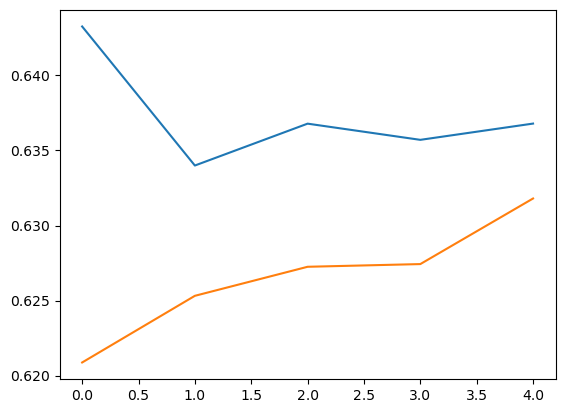

In [71]:
# Plot dos erros
plt.plot(losses)
plt.plot(val_losses)

In [72]:
# Nome do modelo
nome_modelo = 'modelos/modelo_final.sav'

In [73]:
# Salva o modelo em disco
pickle.dump(modelo_transformer, open(nome_modelo, 'wb'))

## Avaliação com Dados de Teste

In [74]:
# Carrega o modelo do disco
modelo_final = pickle.load(open(nome_modelo, 'rb'))

In [75]:
type(dataset_teste_final)

torch.utils.data.dataloader.DataLoader

In [76]:
# Listas para os erros
test_losses, test_preds = [], []

In [77]:
# Coloca o modelo em modo de avaliação
modelo_final.eval()

Transformer(
  (input_projection): Linear(in_features=1, out_features=32, bias=True)
  (output_projection): Linear(in_features=32, out_features=1, bias=True)
  (dec_layers): ModuleList(
    (0-2): 3 x TransformerLayer(
      (mlp_hidden): Linear(in_features=32, out_features=32, bias=True)
      (mlp_out): Linear(in_features=32, out_features=32, bias=True)
      (layernorm1): LayerNorm((32,), eps=1e-09, elementwise_affine=True)
      (layernorm2): LayerNorm((32,), eps=1e-09, elementwise_affine=True)
      (dropout1): Dropout(p=0.1, inplace=False)
      (dropout2): Dropout(p=0.1, inplace=False)
      (mha): MultiHeadAttention(
        (wq): Linear(in_features=32, out_features=128, bias=True)
        (wk): Linear(in_features=32, out_features=128, bias=True)
        (wv): Linear(in_features=32, out_features=128, bias=True)
        (dense): Linear(in_features=128, out_features=32, bias=True)
      )
    )
  )
  (dropout): Dropout(p=0.1, inplace=False)
)

In [78]:
# Loop nos dados de teste
for (x, y) in dataset_teste_final:
    
    S = x.shape[-2]
    
    y_pred, _ = modelo_final(x, mask = create_look_ahead_mask(S))
    
    y = y.cpu().detach().numpy() * dados.std(axis = 0) + dados.mean(axis = 0)
    
    y_pred = y_pred.cpu().detach().numpy() * dados.std(axis = 0) + dados.mean(axis = 0)
    
    y = torch.tensor(y)
    
    y_pred = torch.tensor(y_pred)
    
    loss_test = torch.nn.MSELoss()(torch.tensor(y_pred), torch.tensor(y))  # (B,S)
    
    test_losses.append(loss_test.item())
    
    test_preds.append(y_pred.detach().cpu().numpy())

In [79]:
# Ajusta o shape das previsões
test_preds = np.vstack(test_preds)

In [80]:
# Converte os dados de teste em tensores e aplica a normalização
x_test, _ = dataset_teste_final.dataset.tensors
x_test = x_test.cpu().detach().numpy() * dados.std(axis = 0) + dados.mean(axis = 0)

In [81]:
# Tamanho da sequência de entrada
seq_len = 12

In [82]:
# Índice dos dados que serão usados na previsão
index = np.random.randint(32)

In [83]:
index

3

In [84]:
feature_num = 0

In [85]:
# Valores reais no índice 
x_test[index, :, feature_num]

array([360., 435., 497., 759., 794., 594., 494., 623., 212., 350., 339.,
       138.], dtype=float32)

In [86]:
# Valores previstos no índice 
pred = test_preds[index, :, feature_num]

In [87]:
pred

array([423.19305, 426.10028, 438.1406 , 706.94464, 725.69006, 666.92426,
       555.481  , 611.86615, 404.71887, 403.81372, 403.1394 , 369.67322],
      dtype=float32)

In [88]:
# Valor real e valor previsto
x_test = x_test[index, :, feature_num]
pred = test_preds[index, :, feature_num]
x = np.linspace(1, seq_len, seq_len)

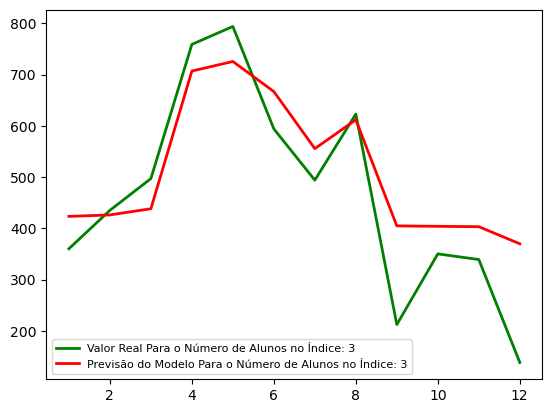

In [89]:
# Plot
plt.plot(x, x_test, 'green', lw = 2, label = 'Valor Real Para o Número de Alunos no Índice: {}'.format(index))
plt.plot(x, pred, 'red', lw = 2, label = 'Previsão do Modelo Para o Número de Alunos no Índice: {}'.format(index))
plt.legend(fontsize = 8)
plt.show()

# Fim